In [1]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_data = nib.load('../../images/1/FLAIR.nii.gz').get_fdata()

In [3]:
# Median Filter with noise detection using finite differences (Edge filter)
filtered_image_data = np.zeros_like(image_data)

#threshold = 500

# Estimate the standard deviation of the pixel intensity
std = np.std(image_data)

for x in range(1, image_data.shape[0]-2):
    for y in range(1, image_data.shape[1]-2):
        for z in range(1, image_data.shape[2]-2):
            # Compute the derivatives in x, y, and z directions
            dx = image_data[x+1, y, z] - image_data[x-1, y, z]
            dy = image_data[x, y+1, z] - image_data[x, y-1, z]
            dz = image_data[x, y, z+1] - image_data[x, y, z-1]

            # Compute the magnitude of the gradient
            magnitude = np.sqrt(dx*dx + dy*dy + dz*dz)

            
            # Compute the threshold using a fraction of the standard deviation
            threshold = 3 * std

            # If the magnitude is below the threshold, apply median filter
            if magnitude < threshold:
                neighbours = []
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        for dz in range(-1, 2):
                            neighbours.append(image_data[x+dx, y+dy, z+dz])
                median = np.median(neighbours)
                filtered_image_data[x, y, z] = median
            else:
                filtered_image_data[x, y, z] = image_data[x, y, z]


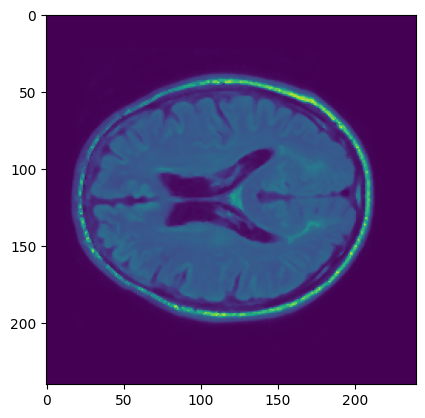

In [4]:
plt.imshow(filtered_image_data[:, :, 24])
# plt.imshow(filtered_image_data[:, :, 24]-image_data[:, :, 24])